CNN은 이미지나 영상 등을 분석할 때 사용된다. 예를 들면 강아지인가 고양이인가를 구분할 때 쓰여진다.-

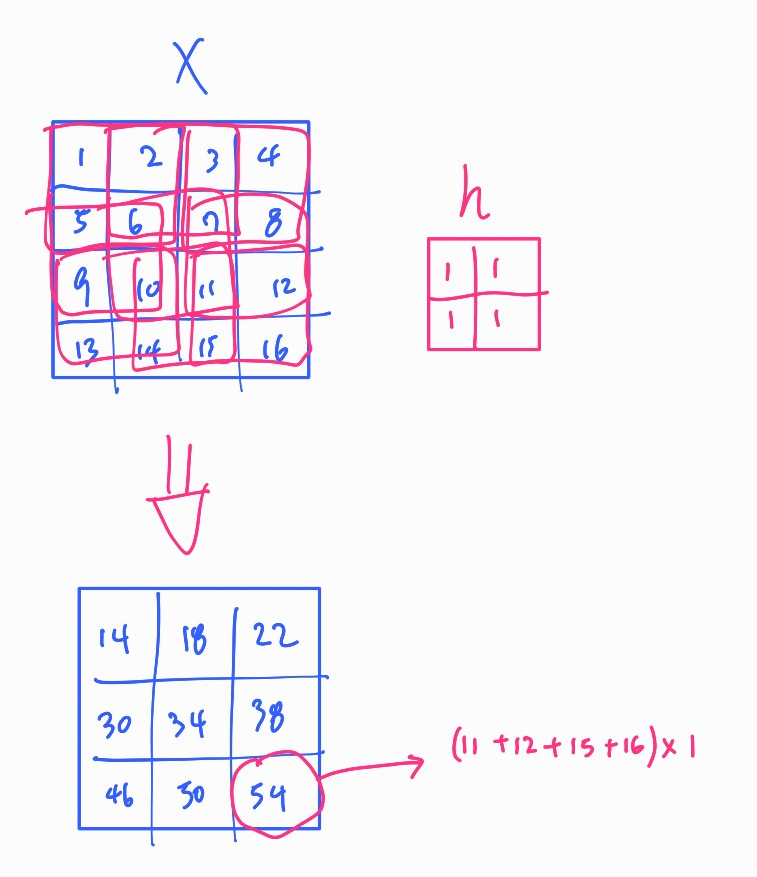

1,2,5,6의 숫자를 필터의 지정 위치 숫자와 곱한 후 모두 더하는 식이다.
4*4의 이미지를 2*2사이즈의 필터를 사용해서 분석한다고 한다면 결과값은 3*3이 된다.  
4*4의 사이즈를 유지하고싶다면 이미지의 가장자리에 0을 추가하면 그대로 4*4이미지가 나올 것이다.

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777) 

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   
Y = tf.placeholder(tf.float32, [None, 10])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\appdata\

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


이미지의 사이즈는 28*28에 한가지 컬러, 즉 흑백이다. -1은 n개의 이미지를 의미한다.

In [2]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

Instructions for updating:
Colocations handled automatically by placer.


stddev: 정규분포의 표준편차   
W1에서는 conv레이어는 28*28에 32가지 필터를 사용하여 pool레이어는 14*14사이즈가 된다.   
W2에서는 conv레이어는 4*14에 64가지 필터를 사용하여 pool레이어는 7*7사이즈가 된다.   
padding을 'same'으로 할 경우에 가장자리에 0이 생겨 이미지의 사이즈를 유지할 수 있다. 하지만 stride 가 2일 경우에는 이미지 사이즈가 줄어든다.   
L2_flat은 fully connected 레이어로 총 3136개가 나온다.

In [3]:
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

두번째 레이어를 통과시킨 fully connected 값을 받아 0부터 9까지의 숫자를 선택한다.

In [4]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Learning started. It takes sometime.
Epoch: 0001 cost = 0.345597186
Epoch: 0002 cost = 0.091762216
Epoch: 0003 cost = 0.068273746
Epoch: 0004 cost = 0.056295191
Epoch: 0005 cost = 0.046863079
Epoch: 0006 cost = 0.040907674
Epoch: 0007 cost = 0.036471546
Epoch: 0008 cost = 0.032595918
Epoch: 0009 cost = 0.027710054
Epoch: 0010 cost = 0.024607346
Epoch: 0011 cost = 0.022164846
Epoch: 0012 cost = 0.020376267
Epoch: 0013 cost = 0.016961640
Epoch: 0014 cost = 0.015502050
Epoch: 0015 cost = 0.013260053
Learning Finished!
Accuracy: 0.9878
Label:  [5]
Prediction:  [5]
